# Hello, FABRIC: Create your first FABRIC slice

## Configure the Environment

Set the environment variable that will be used by this notebook. If you are using the FABRIC JupyterHub most of the environment will be automatically configured for you.  You will only need to set your bastion username, upload your bastion private key, and set the path to where you put your bastion private key. Your bastion username and private key should already be in your possession.  If you do not have a bastion username and private key, please contact the FABRIC admins using the [FABRIC User Forum](https://learn.fabric-testbed.net/forums/) 

If you are using the FABRIC API outside of the JupyterHub you will need to configure all of the environment variables. Defaults below will be correct in many situations but you will need to confirm your configuration.  If you have questions about this configuration, please contact the FABRIC admins using the [FABRIC User Forum](https://learn.fabric-testbed.net/forums/) 

More information about accessing your experiments through the FABRIC bastion hosts can be found [here](https://learn.fabric-testbed.net/knowledge-base/logging-into-fabric-vms/).

In [1]:
import os

os.environ['FABRIC_CREDMGR_HOST']='cm.fabric-testbed.net'
os.environ['FABRIC_ORCHESTRATOR_HOST']='orchestrator.fabric-testbed.net'
os.environ['FABRIC_TOKEN_LOCATION']=os.environ['HOME']+'/work/fabric_token.json'

os.environ['FABRIC_BASTION_USERNAME']='pruth'
os.environ['FABRIC_BASTION_KEY_LOCATION']=os.environ['HOME']+'/work/.ssh/id_rsa_fabric'

os.environ['FABRIC_SLICE_PRIVATE_KEY_FILE']=os.environ['HOME']+'/.ssh/id_rsa'
os.environ['FABRIC_SLICE_PUBLIC_KEY_FILE']=os.environ['HOME']+'/.ssh/id_rsa.pub'

os.environ['FABRIC_BASTION_HOST'] = 'bastion-1.fabric-testbed.net'
os.environ['FABRIC_BASTION_HOST_PRIVATE_IPV4'] = '192.168.11.226'
os.environ['FABRIC_BASTION_HOST_PRIVATE_IPV6'] = '2600:2701:5000:a902::c'

## Setup the Experiment

#### Import FABRIC API

In [2]:
import json
import traceback
from fabrictestbed_extensions.fablib.fablib import fablib

#### Create the FABRIC Proxies

The FABRIC API is used via proxy objects that manage connections to the control framework.  

#### (Optional) Query Available Resources

This optional command queries the FABRIC services to find the available resources. It may be useful for finding a site with available capacity.

Available Resources: NCSA: { cpu: 6/6 , core: 180/192 , ram: 1,476/1,536 G, disk: 60,300/60,600 G, unit: 3/3 }
	Components:
		NVME-P4510:  NVME P4510 { disk: 8,640/9,600 G, unit: 9/10 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 2/2 }
		GPU-RTX6000:  GPU RTX6000 { unit: 3/3 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 378/381 }
	Site Interfaces:
		NCSA_STAR: TrunkPort { bw: 100/100 Gbps}
TACC: { cpu: 10/10 , core: 316/320 , ram: 2,544/2,560 G, disk: 116,380/116,400 G, unit: 5/5 }
	Components:
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/4 }
		GPU-RTX6000:  GPU RTX6000 { unit: 6/6 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		NVME-P4510:  NVME P4510 { disk: 15,360/15,360 G, unit: 16/16 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 635/635 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
	Site Interfaces:
		TACC_UTAH: TrunkPort { bw: 10

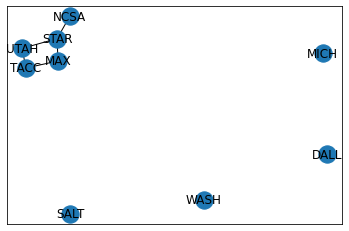

In [3]:
try:
    available_resources = fablib.get_available_resources()
    print(f"Available Resources: {available_resources}")
    available_resources.draw()
except Exception as e:
    print(f"Error: {e}")

## Create the Experiment Slice

#### Configure the Experiment Parameters



In [ ]:
slice_name = 'MySlice'
site = 'MAX'
node_name = 'Node1'
username = 'centos'
image = 'default_centos_8'
image_type = 'qcow2'
cores = 2
ram = 2
disk = 2

### Create Slice

Creates a single node with basic compute capabilities.

<img src="./figs/SingleNode.png" width="20%"><br>


In [ ]:
try:
    #Create Slice
    slice = fablib.new_slice(name=slice_name)

    # Add node
    node = slice.add_node(name=node_name, site=site)
    node.set_capacities(cores=cores, ram=ram, disk=disk)
    node.set_image(image)

    #Submit Slice Request
    slice.submit(wait_progress=True)
except Exception as e:
    print(f"Slice Fail: {e}")
    traceback.print_exc()

### Query Slices

You can get a list of all your slices from the slice manager. If this is your first slice, it should return only one slice.
 

In [ ]:
try:
    slices = fablib.get_slices()
    for slice in slices:
        print(f"Slice: {slice.get_name()}")
except Exception as e:
    print(f"Get Slices Fail: {e}")
    traceback.print_exc()

### Get the New Slice

Your new slice is in the list of all your slices. You can loop through the list of slices to get the new slice. Python has a standard tool to filter lists. Try using a lambda function to filter out your slice using its name.

In [ ]:
try:
    slice = fablib.get_slice(name=slice_name)
    print(f"Slice: {slice.get_name()}")
except Exception as e:
    print(f"Get Slices Fail: {e}")
    traceback.print_exc()

### Wait for the Slice to Build

In [ ]:
try:
    slice = fablib.get_slice(name=slice_name)
    print(f"Slice: {slice.get_name()}")
    
    slice.wait(progress=True)
except Exception as e:
    print(f"Fail: {e}")
    traceback.print_exc()

### Get the Slice Topology

In [ ]:
try:
    slice = fablib.get_slice(name=slice_name)
    for node in slice.get_nodes():
        print("Node:")
        print(f"   Name              : {node.get_name()}")
        print(f"   Cores             : {node.get_cores()}")
        print(f"   RAM               : {node.get_ram()}")
        print(f"   Disk              : {node.get_disk()}")
        print(f"   Image             : {node.get_image()}")
        print(f"   Image Type        : {node.get_image_type()}")
        print(f"   Host              : {node.get_host()}")
        print(f"   Site              : {node.get_site()}")
        print(f"   Management IP     : {node.get_management_ip()}")
        print(f"   Reservation ID    : {node.get_reservation_id()}")
        print(f"   Reservation State : {node.get_reservation_state()}")
        print(f"   Components        : {node.get_components()}")
        print(f"   Interfaces        : {node.get_interfaces()}")
        print(f"   SSH Command       : {node.get_ssh_command()}")
        print()    
except Exception as e:
    print(f"Fail: {e}")
    traceback.print_exc()

## Accessing the VM

#### Terminal SSH Command

Connecting to your VMs requests you to jump through the bastion host to the VM using the keys configured above. From a terminal you can ssh to the VM using the command generated by the following command.


#### SSH with Python (paramiko)

Most experiments will require automated configuration and execution. You can use the paramiko Python library to execute arbitrary commands on your VMs. 

The following cells use paramiko to execute a "Hello, FABRIC" bash script. The cell uses the bastion and VM keys defined at the top of this notebook to jump through the bastion host and execute the script.


In [ ]:
command= 'echo Hello, FABRIC from node `hostname -s`'

In [ ]:
try:
    slice = fablib.get_slice(name=slice_name)
    for node in slice.get_nodes():
        stdout, stderr = node.execute(command)
        print(stdout)
except Exception as e:
    print(f"Fail: {e}")
    traceback.print_exc()

## Delete Slice

In [ ]:
try:
    slice = fablib.get_slice(name=slice_name)
    slice.delete()
except Exception as e:
    print(f"Fail: {e}")
    traceback.print_exc()

In [8]:
try:
    slice = fablib.delete_all()
except Exception as e:
    print(f"Fail: {e}")
    traceback.print_exc()